In [1]:
import os

import matplotlib.pyplot as plt
from matplotlib.pylab import cm
from mcl_clustering import find_clusters
import networkx as nx
import random
import pandas as pd
import time

Clusters number: 11


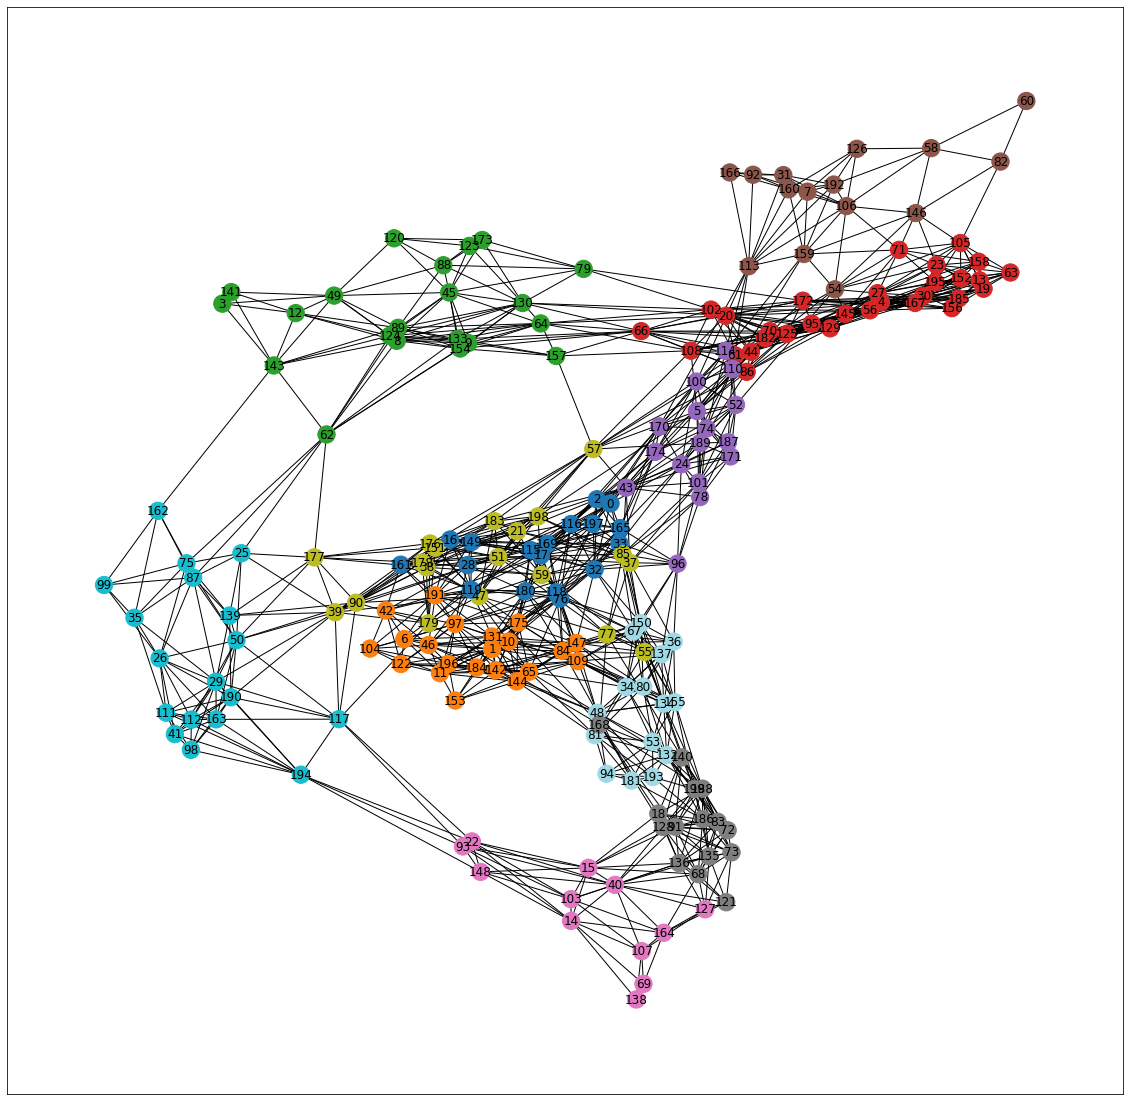

In [2]:
def test_clustering(graph):
    clusters = find_clusters(graph)
    print(f'Clusters number: {len(clusters)}')

    cluster_map = {node: i for i, cluster in enumerate(clusters) for node in cluster}
    colors = [cluster_map[i] for i in range(len(graph.nodes()))]
    plt.figure(figsize=(20, 20))
    nx.draw_networkx(graph, node_color=colors, cmap = cm.tab20)

positions = {i: (random.random() * 2 - 1, random.random() * 2 - 1) for i in range(200)}
test_clustering(nx.random_geometric_graph(200, 0.3, pos=positions))


In [11]:
def write_clusters_to_file(clusters, file):
    node_to_cluster = {}
    for cluster_index, cluster in enumerate(clusters):
        for node in cluster:
            node_to_cluster[node+1] = cluster_index + 1

    with open(file, 'a') as f:
        for node, cluster in node_to_cluster.items():
            f.write(str(node))
            f.write(', ')
            f.write(str(cluster))
            f.write('\n')

def test_algorithm():
    input_dir = 'input/'
    output_dir = 'output/'
    for input_file in os.listdir(input_dir):
        graph = nx.convert_matrix.from_numpy_matrix(pd.read_csv(input_dir + input_file, header=None).to_numpy())
        start_time = time.time()
        clusters = find_clusters(graph)
        print(f'Running time on {input_file}: {time.time() - start_time}')
        print(f'Clusters found: {len(clusters)}')
        write_clusters_to_file(clusters, file=output_dir + input_file)

test_algorithm()


Running time on D1-K=2.csv: 0.01562809944152832
Clusters found: 2
Running time on D1-UNC.csv: 0.04688692092895508
Clusters found: 25
Running time on D2-K=7.csv: 0.03125143051147461
Clusters found: 5
Running time on D2-UNC.csv: 0.0377960205078125
Clusters found: 15
Running time on D3-K=12.csv: 0.031252384185791016
Clusters found: 11
Running time on D3-UNC.csv: 0.03127288818359375
Clusters found: 9
